# MATH7502, 2019, Class 2

In [1]:
x = 35;
typeof(x)

Int64

In [3]:
y = 35.1;
typeof(y)

Float64

In [5]:
b = [1,2,3];
c = [4,5];
d = [20,-100];
a = vcat(b,c,d)

7-element Array{Int64,1}:
    1
    2
    3
    4
    5
   20
 -100

In [6]:
a[3:5]

3-element Array{Int64,1}:
 3
 4
 5

In [7]:
zeros(4)

4-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0

In [8]:
zeros(2,3)

2×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0

In [10]:
e1 = zeros(4);
e1[1] = 1;
e1

4-element Array{Float64,1}:
 1.0
 0.0
 0.0
 0.0

#### Our function that creates $e_i$ in $R^n$

In [16]:
ee(i,n) = [Float64(j == i) for j in 1:n];

#alternative
ee(i,n) = [j == i ? 1.0 : 0.0 for j in 1:n]

ee (generic function with 1 method)

In [17]:
ee(2,4)

4-element Array{Float64,1}:
 0.0
 1.0
 0.0
 0.0

In [18]:
ones(7)

7-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [21]:
nnz(x) = sum(x .!= 0)

nnz (generic function with 1 method)

In [22]:
nnz([1.3,-3,0.0,5.4])

3

In [23]:
nnz(rand(10^6))

1000000

In [34]:
rand([0,1,2,3],5)

5-element Array{Int64,1}:
 0
 1
 2
 0
 1

In [35]:
nnz(rand([0,1,2,3],10^6))

750850

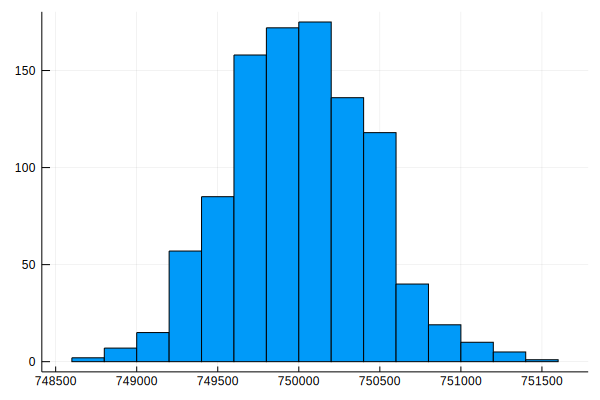

In [38]:
using Plots
histogram([nnz(rand([0,1,2,3],10^6)) for _ in 1:10^3],legend=false)

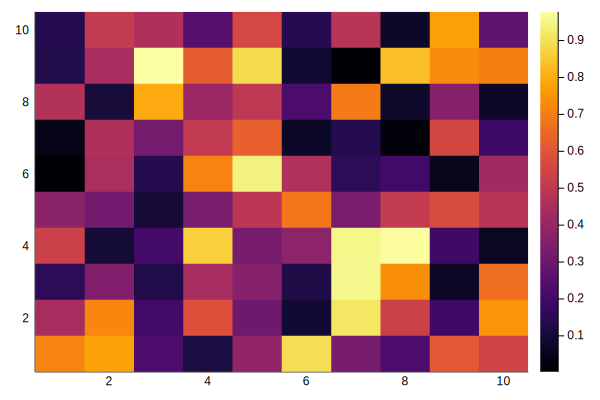

In [43]:
image = rand(10,10);
heatmap(image)

In [47]:
[image[:,k] for k in 1:10]

10-element Array{Array{Float64,1},1}:
 [0.715094, 0.441899, 0.149756, 0.532836, 0.372181, 0.00243376, 0.0386126, 0.467159, 0.127157, 0.133742]
 [0.779366, 0.717888, 0.34749, 0.0942953, 0.311195, 0.448452, 0.461885, 0.102772, 0.443266, 0.512191]   
 [0.217253, 0.19843, 0.123191, 0.198694, 0.0966978, 0.132946, 0.317899, 0.794308, 0.977914, 0.460914]   
 [0.111794, 0.584337, 0.440176, 0.86636, 0.329903, 0.711199, 0.508799, 0.404509, 0.621042, 0.242503]    
 [0.388348, 0.304979, 0.358312, 0.321379, 0.491207, 0.943698, 0.629211, 0.496795, 0.891527, 0.559581]   
 [0.899118, 0.0856713, 0.120328, 0.375009, 0.682471, 0.463803, 0.0662746, 0.217579, 0.0883411, 0.138599]
 [0.322852, 0.917132, 0.954385, 0.953399, 0.332276, 0.150862, 0.135028, 0.693056, 0.00490767, 0.48051]  
 [0.216646, 0.531499, 0.737675, 0.972997, 0.511557, 0.193532, 0.0181174, 0.0748028, 0.835425, 0.0694342]
 [0.606492, 0.189386, 0.0642715, 0.189017, 0.574422, 0.0500396, 0.557302, 0.356888, 0.729704, 0.775178] 
 [0.544453, 0.751

In [50]:
imageAsVectorCols = vcat([image[:,k] for k in 1:10]...)
imageAsVectorRows = vcat([image[k,:] for k in 1:10]...)
imageAsVectorCols[100] == imageAsVectorRows[100]

true

In [51]:
imageAsVectorCols[99] == imageAsVectorRows[99]

false

In [52]:
imageAsVectorCols[1] == imageAsVectorRows[1]

true

#### There is a "covert" way to do it... (not sure how...)

In [42]:
convert(Array{Float64,1},image)

MethodError: MethodError: no method matching Array{Float64,1}(::Array{Float64,2})
Closest candidates are:
  Array{Float64,1}(::AbstractArray{S,N}) where {T, N, S} at array.jl:482
  Array{Float64,1}() where T at boot.jl:421
  Array{Float64,1}(!Matched::UndefInitializer, !Matched::Int64) where T at boot.jl:402
  ...

In [53]:
? unit

search: UnitRange oneunit codeunit codeunits ncodeunits AbstractUnitRange

Couldn't find unit
Perhaps you meant union, edit, exit, wait, Int, oneunit, union!, unique or Union


No documentation found.

Binding `unit` does not exist.


In [57]:
using LinearAlgebra

In [62]:
? convert

search: convert code_native @code_native



```
convert(T, x)
```

Convert `x` to a value of type `T`.

If `T` is an [`Integer`](@ref) type, an [`InexactError`](@ref) will be raised if `x` is not representable by `T`, for example if `x` is not integer-valued, or is outside the range supported by `T`.

# Examples

```jldoctest
julia> convert(Int, 3.0)
3

julia> convert(Int, 3.5)
ERROR: InexactError: Int64(3.5)
Stacktrace:
[...]
```

If `T` is a [`AbstractFloat`](@ref) or [`Rational`](@ref) type, then it will return the closest value to `x` representable by `T`.

```jldoctest
julia> x = 1/3
0.3333333333333333

julia> convert(Float32, x)
0.33333334f0

julia> convert(Rational{Int32}, x)
1//3

julia> convert(Rational{Int64}, x)
6004799503160661//18014398509481984
```

If `T` is a collection type and `x` a collection, the result of `convert(T, x)` may alias all or part of `x`.

```jldoctest
julia> x = Int[1, 2, 3];

julia> y = convert(Vector{Int}, x);

julia> y === x
true
```


### So here is a "cleaner" way to convert a matrix into a vector

In [67]:
A = [1. 2; 3 4]

2×2 Array{Float64,2}:
 1.0  2.0
 3.0  4.0

In [65]:
vcat(A...)

4-element Array{Int64,1}:
 1
 3
 2
 4

In [66]:
hcat(A...)

1×4 Array{Int64,2}:
 1  3  2  4